In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
filename = 'data/logo.png'

In [3]:
im1 = cv2.imread(filename)

In [4]:
print ('Array type = %s  shape = %s' % (im1.dtype, im1.shape))

Array type = uint8  shape = (1826, 2029, 3)


In [5]:
shape = im1.shape
height, width, depth = shape
print('height: %s  width: %s' % (height, width))

height: 1826  width: 2029


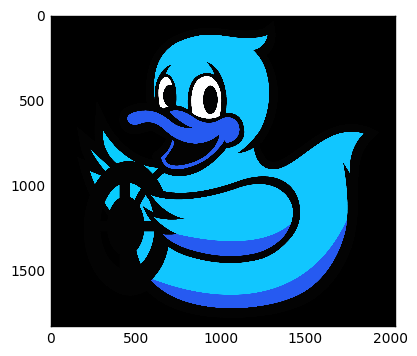

In [6]:
plt.imshow(im1)
plt.show()

In [ ]:
# copy image
im2 = im1.copy()
# paint square
S = 50
u, v = 100, 500
im2[u:(u+S), v:(v+S), :] = 255

In [ ]:
plt.imshow(im2)
plt.show()

In [ ]:
B = im1[:,:,0]
G = im1[:,:,1]
R = im1[:,:,2] 

In [ ]:
rgb = np.empty_like(im1)

In [ ]:
rgb[:,:,0] = R
rgb[:,:,1] = G
rgb[:,:,2] = B

In [ ]:
plt.imshow(rgb); plt.show()

Using OpenCV conversions:

In [ ]:
im1_rgb = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

plt.imshow(im1_rgb); plt.show()


Where is the transparency?

In [ ]:
im2_bgra = cv2.imread(filename, cv2.IMREAD_UNCHANGED)

In [ ]:
print im2_bgra.shape

In [ ]:
im2_rgba =  cv2.cvtColor(im2_bgra, cv2.COLOR_BGRA2RGBA)

In [ ]:
plt.imshow(im2_rgba); plt.show()

In [ ]:
print im2_rgba.shape

In [ ]:
mask = im2_rgba[:,:,3]

In [ ]:
plt.imshow(mask, cmap='gray'); plt.show()

In [ ]:
plt.imshow(mask[500:700, 500:700], cmap='gray'); plt.show()

In [ ]:
alpha = mask / 255.0
beta = 1.0 - alpha

In [ ]:
background_bgr = cv2.imread('data/bg.jpg')
background_rgb = cv2.cvtColor(background_bgr, cv2.COLOR_BGR2RGB)
H, W, _ = im2_rgba.shape
bg = cv2.resize(background_rgb, (W, H))

plt.imshow(bg); plt.show()

In [ ]:
funky_rgb = np.zeros(dtype='uint8', shape=(height, width, 3))

In [ ]:
for i in [0, 1, 2]:
    funky_rgb[:, :, i] =  im2_rgba[:,:,i] * alpha + bg[:,:,i] * (1-alpha)

In [ ]:
plt.imshow(funky_rgb); plt.show()

In [ ]:
conv = cv2.cvtColor(funky_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite( 'data/funky_rgb.png', conv)